In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [2]:
restart_file = xr.open_dataset('./SalishSeaCast_02667600_restart.nc')


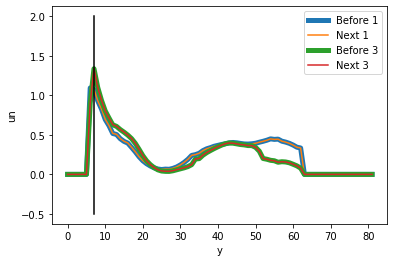

In [3]:
#2  392   24

ib, ie = 385, 467
uveln19 = restart_file.un[0, 25-1]
uvelb19 = restart_file.ub[0, 25-1]
uvelb19[ib:ie, 1].plot(label="Before 1", linewidth=5)
uveln19[ib:ie, 1].plot(label="Next 1")
uvelb19[ib:ie, 3].plot(label="Before 3", linewidth=5)
uveln19[ib:ie, 3].plot(label="Next 3")
plt.plot([392-ib, 392-ib], [-0.5, 2], color='k');
plt.legend();

In [4]:

restart_file.un[0, :, :, 1] = restart_file.un[0, :, :, 2]
restart_file.ub[0, :, :, 1] = restart_file.ub[0, :, :, 2]
restart_file.vn[0, :, :, 1] = restart_file.vn[0, :, :, 2]
restart_file.vb[0, :, :, 1] = restart_file.vb[0, :, :, 2]

In [5]:
restart_file.attrs['Modified'] = 'copied velocity one away from west boundary to boundary'
restart_file.attrs

{'file_name': 'SalishSeaCast_02667600_restart.nc',
 'TimeStamp': '30/08/2020 08:45:05 -0400',
 'Modified': 'copied velocity one away from west boundary to boundary'}

In [7]:
restart_file.to_netcdf('SalishSeaCast_MOD_02667600_restart.nc')
